In [191]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def generateData(numUsers, numItems):
    user_itemMat = np.random.randint(0, 5, [numUsers, numItems])
    return user_itemMat

In [184]:
def SVD(dataMat):
    U, sigma, VT = np.linalg.svd(dataMat)
    cumsum = np.cumsum(sigma**2)
    mark = 0
    for i in range(len(cumsum)):
        # find out how mang sigular values/features/dimensions can get to 90% energy
        if cumsum[i] / np.sum(sigma**2) > 0.9:
            mark = i
            break
    return U, sigma, VT, i + 1

# collaborative filtering
def pearsSim(A, B):
    return 0.5 + 0.5 * np.corrcoef(A, B, rowvar=True)[0, 1]  # 0.5 + 0.5 * Similarity : range from 0-1

def standEst(dataMat, userIdx, itemIdx, threshold=3):
    """
    Due to much larger amounts of users compared with number of items,
    we use User-User collaborative filtering
    """
    #numUsers, numItems = np.shape(dataMat)
    userGroup = np.array(np.nonzero(dataMat[:, itemIdx])).T # find a user group who are also rated this item
    similarities = []
    for i in range(len(userGroup)):
        similarities.append(pearsSim(dataMat[userIdx], dataMat[userGroup[i]]))
    # sort the similarities by descending oder and pick the most similar users
    sortedSim = np.sort(similarities)[::-1][:threshold] 
    sortedSim = np.reshape(sortedSim, (1, -1))
    # find the user index corresponding to the most similairties
    candidates = userGroup[np.argsort(similarities)[::-1][:threshold]]
    # averaged weights to estimated the rate
    estimateRate = (sortedSim.dot(dataMat[candidates, itemIdx])) / np.sum(sortedSim) 
    return float(estimateRate)

def recommand(dataMat, estMethod， numRec=3):
    numUsers, numItems = np.shape(dataMat)
    recommandations = []
    if estMehod = 'standEst':
        for userIdx in range(numUsers):
            estimateRates = []
            recommandCandidates = []
            recommandation = []
            dictRecom = {}
            for itemIdx in range(numItems):
                if dataMat[userIdx, itemIdx] == 0:
                    estimateRates.append(standEst(dataMat, userIdx, itemIdx, threshold=3))
                    recommandCandidates.append(itemIdx)
            estimateRates = np.array(estimateRates)
            recommandCandidates = np.array(recommandCandidates)
            # sort the estimated ratings and recommandation item index by descending order
            recommandLists = np.sort(estimateRates)[::-1][:numRec] 
            recommandCandidates = recommandCandidates[np.argsort(estimateRates)[::-1][:numRec]]
            if len(recommandLists) < numRec:
                for i in range(len(recommandLists)):
                    recommandation.append(tuple([int(recommandCandidates[i]), int(np.round(recommandLists[i]))]))
            else:
                for n in range(numRec):
                    recommandation.append(tuple([int(recommandCandidates[n]), int(np.round(recommandLists[n]))]))
            recommandations.append(recommandation)
        return recommandations
    if estMehod = 'svdEst':
        U, sigma, VT, mark = SVD(dataMat)
        sigma = np.array(np.eye(mark) * sigma[:mark])
        reducedMat = U[:, :mark].dot(sigma)
        

In [169]:
data = generateData(200, 20)
recommandations = recommand(data, 'standEst')
recommandations

[[(3, 2), (16, 2), (18, 2)],
 [(3, 2), (18, 1), (12, 1)],
 [(19, 3), (0, 2), (16, 2)],
 [(15, 2), (1, 2), (7, 1)],
 [(17, 2), (10, 1)],
 [(11, 1), (16, 1), (6, 1)],
 [(16, 2), (4, 2), (12, 2)],
 [(1, 2), (5, 2), (8, 2)],
 [(10, 3)],
 [(8, 2), (13, 2), (15, 2)],
 [(10, 2), (19, 2), (17, 2)],
 [(13, 3), (18, 2), (14, 2)],
 [(6, 2), (0, 2), (2, 2)],
 [(5, 2), (7, 2), (3, 2)],
 [(1, 2), (19, 2), (12, 1)],
 [(15, 3), (10, 2), (6, 1)],
 [(9, 3), (10, 2), (4, 2)],
 [(2, 3), (19, 2), (8, 2)],
 [(9, 2)],
 [(14, 2), (9, 2), (12, 1)],
 [(2, 2), (8, 2), (13, 2)],
 [(3, 3), (13, 3), (15, 2)],
 [(17, 2), (14, 2), (19, 1)],
 [(11, 2), (0, 1), (5, 1)],
 [(10, 3), (15, 2), (8, 2)],
 [(9, 2), (12, 2), (5, 2)],
 [(9, 2), (6, 2), (3, 1)],
 [(11, 3), (3, 3), (5, 2)],
 [(6, 2), (8, 1)],
 [],
 [(13, 2), (7, 2), (19, 2)],
 [(16, 2), (12, 1), (8, 1)],
 [(1, 2), (3, 2), (19, 2)],
 [(3, 1)],
 [(2, 3), (19, 2), (9, 2)],
 [(1, 2), (12, 2), (8, 1)],
 [],
 [(17, 2), (3, 2), (4, 2)],
 [(9, 2), (10, 1), (19, 1)],
 [(1

In [178]:
def loadExData2():
    return[[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5],
           [0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3],
           [0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0],
           [3, 3, 4, 0, 0, 0, 0, 2, 2, 0, 0],
           [5, 4, 5, 0, 0, 0, 0, 5, 5, 0, 0],
           [0, 0, 0, 0, 5, 0, 1, 0, 0, 5, 0],
           [4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 1],
           [0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4],
           [0, 0, 0, 2, 0, 2, 5, 0, 0, 1, 2],
           [0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]]

In [185]:
datasets = loadExData2()
U, sigma, VT, mark = SVD(datasets)
mark

3

# Image Compression

In [204]:
def printMat(inMat, thresh=0.8):
    for i in range(32):
        for k in range(32):
            if float(inMat[i,k]) > thresh:
                print(1),
            else: print(0),
        print('')

****original matrix******


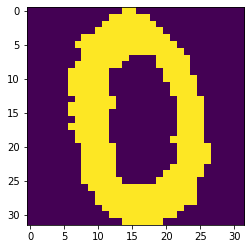

In [205]:
myl = []
for line in open('0_5.txt').readlines():
    newRow = []
    for i in range(32):
        newRow.append(int(line[i]))
    myl.append(newRow)
myMat = np.mat(myl)
print("****original matrix******")
plt.imshow(np.reshape(myl, (32, 32))*255)



****reconstructed matrix using 3 singular values******


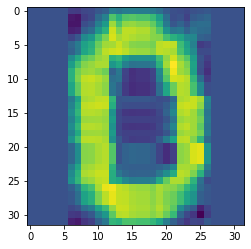

In [206]:
U,Sigma,VT = np.linalg.svd(myMat)
SigRecon = np.mat(np.zeros((3, 3)))
for k in range(3):#construct diagonal matrix from vector
    SigRecon[k,k] = Sigma[k]
reconMat = U[:,:3].dot(SigRecon).dot(VT[:3,:])
print("****reconstructed matrix using %d singular values******" % 3)
plt.imshow(np.reshape(reconMat, (32, 32))*255)